In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pyspedas
from geopack import geopack
from pytplot import tplot
from pytplot import get_data
import pandas as pd
import pickle
import glob  # Add this import
import os

Load IGRF coefficients ...


## SMRAI2 Model

In [2]:
trange = ['2023-10-30','2023-10-31']
omni_vars = pyspedas.omni.data(trange=trange, datatype='5min')
date_str = trange[0].replace('-', '') 

byo=get_data( 'BY_GSM')
bzo=get_data( 'BZ_GSM')
vvo=get_data( 'flow_speed')
nno=get_data( 'proton_density')

alo=get_data( 'AL_INDEX')
auo=get_data( 'AU_INDEX')
alp=pd.DataFrame(alo.y)
aup=pd.DataFrame(auo.y)

tto=byo.times
tlt2=np.zeros(tto.shape[0])

for ii in range(0,tto.shape[0]):
    ut = tto[ii]
    ps = geopack.recalc(ut)
    tlt2[ii]=ps

byp=pd.DataFrame(byo.y)
byp2 = byp.ffill()  # forward-fill missing BY values

bzp=pd.DataFrame(bzo.y)
bzp2 = bzp.ffill()  # forward-fill missing BZ values

vvp=pd.DataFrame(vvo.y)
vvp2 = vvp.ffill()  # forward-fill Vsw values

vvp2=np.log10(vvp2)-2.5

nnp=pd.DataFrame(nno.y)
nnp2 = nnp.ffill()  # forward-fill density values

nnp2=np.log10(nnp2)-1.0

# Solar wind Input
all10 = np.vstack((tlt2.T,byp2.T,bzp2.T,vvp2.T,nnp2.T))
data_s = all10.T

09-Jan-26 10:32:14: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_5min/2023/
09-Jan-26 10:32:15: Downloading https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_5min/2023/omni_hro_5min_20231001_v01.cdf to omni_data/hro_5min/2023/omni_hro_5min_20231001_v01.cdf
09-Jan-26 10:32:16: Download complete: omni_data/hro_5min/2023/omni_hro_5min_20231001_v01.cdf
09-Jan-26 10:32:17: Floating point data values for variable PR-FLX_10 are all fillval (9.999999e+04)
09-Jan-26 10:32:17: Floating point data values for variable PR-FLX_30 are all fillval (9.999999e+04)
09-Jan-26 10:32:17: Floating point data values for variable PR-FLX_60 are all fillval (9.999999e+04)


### AL/ AU from SMRAI2

In [3]:
cmap0,unit0,f0,cb_min, cb_max,cb_div  ='PiYG','kV',1e-3, -100,100,20 #kilo volt

cmap1,unit1,f1,cb_min1, cb_max1,cb_div1  ='magma','A/km',1e3, 0,500,20 #A/km

theta=np.array([ 0.0, 11.25, 22.5, 33.75, 45.0, 56.25, 67.5, 78.75,
       90.0, 101.25, 112.5, 123.75, 135.0, 146.25, 157.5, 168.75, 
       180.0, 191.25, 202.5, 213.75, 225.0, 236.25, 247.5, 258.75, 
       270.0, 281.25, 292.5, 303.75, 315.0, 326.25, 337.5, 348.75, 360.0])

#normal grid lon
theta=np.array([  1.688 ,   6.188 ,  10.688 ,  15.188 ,  19.688 ,  24.188 ,  28.688 ,  33.188 ,  37.688 ,  42.188,
                46.688 ,  51.188 ,  55.688 ,  60.188 ,  64.688 ,  69.188 ,  73.688 ,  78.188 ,  82.688 ,  87.188,
                91.688 ,  96.188 , 100.688 , 105.188 , 109.688 , 114.188 , 118.688 , 123.188 , 127.688 , 132.188,
                136.688 , 141.188 , 145.687 , 150.188 , 154.688 , 159.188 , 163.688 , 168.187 , 172.687 , 177.187,
                181.687 , 186.187 , 190.687 , 195.187 , 199.687 , 204.187 , 208.687 , 213.187 , 217.687 , 222.187,
                226.687 , 231.187 , 235.687 , 240.187 , 244.687 , 249.187 , 253.687 , 258.187 , 262.687 , 267.187,
                271.687 , 276.187 , 280.687 , 285.187 , 289.687 , 294.187 , 298.687 , 303.187 , 307.687 , 312.187,
                316.687 , 321.187 , 325.687 , 330.187 , 334.687 , 339.187 , 343.687 , 348.187 , 352.687 , 357.187, 367.688])

theta=theta-90.
theta=theta/360*np.pi*2

#north
r=np.array([53.109 ,  55.172 ,  57.234 ,  59.297 ,  61.359 ,  63.422 ,  65.484 ,  66.783 ,  67.826 ,  68.870,
            69.913 ,  70.957 ,  72.000 ,  73.044 ,  74.087 ,  75.130 ,  76.174 ,  77.217 ,  78.261 ,  79.304,
            80.348 ,  81.391 ,  82.435 ,  83.478 ,  84.522 ,  85.565 ,  86.609 ,  87.652 ,  88.696 ,  89.739])
r=90-r

#pot delta lat north
dn=np.array([ 2.063 ,   2.063 ,   2.063 ,   2.063 ,   2.063 ,   2.063 ,   1.808 ,   1.043 ,   1.044 ,   1.043,
             1.044 ,   1.043 ,   1.044 ,   1.043 ,   1.043 ,   1.043 ,   1.044 ,   1.044 ,   1.043 ,   1.043,
             1.043 ,   1.043 ,   1.044 ,   1.043 ,   1.044 ,   1.043 ,   1.043 ,   1.043 ,   1.043 ,  1.043])

dn=dn*3.141592*2./360.0


#dn=6378.0*dn*2.0 #km
dn=6378.0*(dn+np.roll(dn,-1,axis=0))#km


#pot delta north
de=np.array([   0.04715 ,    0.04486 ,    0.04251 ,    0.04010 ,    0.03765 ,    0.03514 ,    0.03259 ,    0.03096 ,    0.02964 ,    0.02831,
             0.02697 ,    0.02563 ,    0.02427 ,    0.02291 ,    0.02153 ,    0.02015 ,    0.01877 ,    0.01738 ,    0.01598 ,    0.01458,
                0.01317 ,    0.01176 ,    0.01034 ,    0.00892 ,    0.00750 ,    0.00607 ,    0.00465 ,    0.00322 ,    0.00179 ,    0.00036])

de=6378.0*(de+np.roll(de,-1,axis=0))#km

th1=np.ones(81)
tt9, ee = np.meshgrid(th1,de) 
tt9, nn = np.meshgrid(th1,dn) 


all10 = np.vstack((tlt2.T,byp2.T,bzp2.T,vvp2.T,nnp2.T))
data_s = all10.T

flearn=1e-6 #for pot and fac
modelp = pickle.load(open('SMRAI2/modelp099_250.sav','rb'))
test_Y = modelp.predict(data_s)
pcap = test_Y/flearn

flearn=1e-3 #for sigma
modelw = pickle.load(open('SMRAI2/modelw099_300.sav','rb'))
test_Y = modelw.predict(data_s)
pcaw=test_Y/flearn


meanw=np.load('SMRAI2/meanw.npy')
imgpcaw=np.load('SMRAI2/imgw.npy')
datpcaw=pcaw

xy=np.dot(datpcaw,imgpcaw)+meanw

meanp=np.load('SMRAI2/meanp.npy')
imgpcap=np.load('SMRAI2/imgp.npy')
datpcap=pcap

p=np.dot(datpcap,imgpcap)+meanp


nmax=tto.shape[0]
iarr=np.arange(nmax)

au=np.zeros(nmax)
al=np.zeros(nmax)


for i in iarr:

    iii=i

    z = p[iii].reshape(30,80)*f0 #Volt

    sxy = xy[iii].reshape(30,80) 
    sxy2 = np.append(sxy, sxy[:, 0:1], axis=1)

    dzn=np.roll(z,-1,axis=0)-np.roll(z,1,axis=0) #minus Ex
    dze=np.roll(z,-1,axis=1)-np.roll(z,-1,axis=1) #minus Ey

    z2 = np.append(z, z[:, 0:1], axis=1)
    zn2 = np.append(dzn, dzn[:, 0:1], axis=1)

    hall2=(zn2/nn*sxy2)*f1

    au[i]=np.max(hall2[5:12,:])
    al[i]=np.min(hall2[5:12,:])    


x=np.arange(nmax)*5./60.    

09-Jan-26 10:32:17: /var/folders/h_/72d1j4vd2m9d10h_878vt4v80000gn/T/ipykernel_14541/978032144.py:57: ResourceWarning: unclosed file <_io.BufferedReader name='SMRAI2/modelp099_250.sav'>
  modelp = pickle.load(open('SMRAI2/modelp099_250.sav','rb'))

09-Jan-26 10:32:17: /var/folders/h_/72d1j4vd2m9d10h_878vt4v80000gn/T/ipykernel_14541/978032144.py:62: ResourceWarning: unclosed file <_io.BufferedReader name='SMRAI2/modelw099_300.sav'>
  modelw = pickle.load(open('SMRAI2/modelw099_300.sav','rb'))



### Interpolate SMRAI2 conductivity to match with SMRAI2.1 grids

### Conductivity

In [4]:
flearn=1e-3 #for sigma
with open('SMRAI2/modelw099_300.sav', 'rb') as f:
    modelw = pickle.load(f)

meanw=np.load('SMRAI2/meanw.npy')
imgpcaw=np.load('SMRAI2/imgw.npy')

# Output conductivity
test_w = modelw.predict(data_s)
pcaw=test_w/flearn
esn_xy=pcaw @ imgpcaw + meanw

In [5]:
# SMRAI2 grid

lon = np.array([  0 ,   6.188 ,  10.688 ,  15.188 ,  19.688 ,  24.188 ,
                            28.688 ,  33.188 ,  37.688 ,  42.188 ,  46.688 ,  51.188 ,
                            55.688 ,  60.188 ,  64.688 ,  69.188 ,  73.688 ,  78.188 ,
                            82.688 ,  87.188 ,  91.688 ,  96.188 , 100.688 , 105.188 ,
                           109.688 , 114.188 , 118.688 , 123.188 , 127.688 , 132.188 ,
                           136.688 , 141.188 , 145.687 , 150.188 , 154.688 , 159.188 ,
                           163.688 , 168.187 , 172.687 , 177.187 , 181.687 , 186.187 ,
                           190.687 , 195.187 , 199.687 , 204.187 , 208.687 , 213.187 ,
                           217.687 , 222.187 , 226.687 , 231.187 , 235.687 , 240.187 ,
                           244.687 , 249.187 , 253.687 , 258.187 , 262.687 , 267.187 ,
                           271.687 , 276.187 , 280.687 , 285.187 , 289.687 , 294.187 ,
                           298.687 , 303.187 , 307.687 , 312.187 , 316.687 , 321.187 ,
                           325.687 , 330.187 , 334.687 , 339.187 , 343.687 , 348.187 ,
                           360, 360]) 

lat = np.array([53.109 , 55.172 , 57.234 , 59.297 , 61.359 , 63.422 , 65.484 ,
               66.783 , 67.826 , 68.870 , 69.913 , 70.957 , 72.000 , 73.044 ,
               74.087 , 75.130 , 76.174 , 77.217 , 78.261 , 79.304 , 80.348 ,
               81.391 , 82.435 , 83.478 , 84.522 , 85.565 , 86.609 , 87.652 ,
               88.696 , 89.739])

In [6]:
#SMRAI2.1 grid
nlon, nlat = 72, 20                  # default (High-res: 80×30)
lon1 = np.linspace(0.0, 2*np.pi, nlon + 1)* (180 / np.pi)
lat1 = 50.0 + 40.0 * np.arange(nlat) / nlat

In [7]:
# Cell: interpolate full conductivity onto (lat1, lon1) grid with griddata
from scipy.interpolate import griddata

def interpolate_conductivity(esn_xy_flat, lat_orig, lon_orig, lat_target, lon_target):
    n_time = esn_xy_flat.shape[0]
    n_lat_orig, n_lon_orig = len(lat_orig), len(lon_orig)
    n_lat_new, n_lon_new = len(lat_target), len(lon_target)

    # build coordinate pairs once (original irregular grid)
    lat_grid_orig, lon_grid_orig = np.meshgrid(lat_orig, lon_orig, indexing='ij')
    points_orig = np.column_stack([lat_grid_orig.ravel(), lon_grid_orig.ravel()])

    # target coordinate mesh (regular grid)
    lat_grid_new, lon_grid_new = np.meshgrid(lat_target, lon_target, indexing='ij')
    points_new = np.column_stack([lat_grid_new.ravel(), lon_grid_new.ravel()])

    conductivity_interp = np.empty((n_time, n_lat_new, n_lon_new), dtype=float)

    for t in range(n_time):
        values = esn_xy_flat[t].reshape(n_lat_orig, n_lon_orig).ravel()
        interp_flat = griddata(points_orig, values, points_new, method='linear')
        if np.isnan(interp_flat).any():
            nan_mask = np.isnan(interp_flat)
            interp_flat[nan_mask] = griddata(
                points_orig, values,
                points_new[nan_mask],
                method='nearest'
            )
        conductivity_interp[t] = interp_flat.reshape(n_lat_new, n_lon_new)

    return conductivity_interp

# Example usage
conductivity_interp = interpolate_conductivity(esn_xy, lat, lon[:80], lat1, lon1[:80])

print("Interpolated conductivity shape:", conductivity_interp.shape)
print("Sample range:", np.nanmin(conductivity_interp[0]), "→", np.nanmax(conductivity_interp[0]))

Interpolated conductivity shape: (289, 20, 73)
Sample range: 1.512033787833541 → 20.289439163306202


### AL AU from SMRAI 2.1 Alone

In [8]:
# Upload files from SMRAI2.1 for eletric field E (cntrl) 
cntrl_data_folder = f"SMRAI2.1/substorm_{date_str}/SMRAI2.1"
cntrl_ef_files = sorted(glob.glob(os.path.join(cntrl_data_folder, "ef_est*.dat")))
print(f"{len(cntrl_ef_files)} electric-field files found in SMRAI2_1")

#Load control electric field files into arrays
cntrl_Ey_grid = []
cntrl_Ex_grid = []

for idx, ef_path in enumerate(cntrl_ef_files):
    ef_raw = np.loadtxt(ef_path)
    cntrl_Ey_grid.append(ef_raw[:, 2].reshape(20, 72))
    cntrl_Ex_grid.append(ef_raw[:, 3].reshape(20, 72))

cntrl_Ey_grid = np.stack(cntrl_Ey_grid)     # shape (n_files, 20, 72)
cntrl_Ex_grid = np.stack(cntrl_Ex_grid)

print("Loaded control fields for", cntrl_Ey_grid.shape[0], "time steps")


# build Hall-current AL/AU/AE series from SMRAI2.1 electric field
n_time_cond, n_lat_cond, n_lon_cond = conductivity_interp.shape
n_time_ef_cntrl, n_lat_ef_cntrl, n_lon_ef_cntrl = cntrl_Ex_grid.shape

Ex_cntrl = cntrl_Ex_grid          # V/m on (time, lat, lon)
Ey_cntrl = cntrl_Ey_grid

#Condition to select 60-70 degree latitude band
auroral_rows = slice(6, 12)         

AL_cntrl = np.empty(n_time_ef_cntrl)
AU_cntrl = np.empty(n_time_ef_cntrl)
AE_cntrl = np.empty(n_time_ef_cntrl)

for i in range(n_time_ef_cntrl):
    sigma_xy = conductivity_interp[i, :, :n_lon_ef_cntrl]        # S/m
    Ex_cntrl_new = Ex_cntrl[i]                                    # V/m
    hall_current = sigma_xy * Ex_cntrl_new                # mA/m

    AL_cntrl[i] = np.nanmin(hall_current[auroral_rows])
    AU_cntrl[i] = np.nanmax(hall_current[auroral_rows])
    AE_cntrl[i] = AU_cntrl[i] - AL_cntrl[i]

print("Computed AL/AU/AE from control electric field for", n_time_ef_cntrl, "time steps.")


288 electric-field files found in SMRAI2_1
Loaded control fields for 288 time steps
Computed AL/AU/AE from control electric field for 288 time steps.


## AL AU from SMRAI2.1 + SuperDARN DATA

In [9]:
# Upload files from SMRAI2.1_DAssim for eletric field E (model_DA)
data_folder = f"SMRAI2.1/substorm_{date_str}/SMRAI2.1_DAssim"
ef_files = sorted(glob.glob(os.path.join(data_folder, "ef_est*.dat")))
print(f"{len(ef_files)} electric-field files found in SMRAI2_1_DAssim")

sample_path = ef_files[0]
sample_data = np.loadtxt(sample_path)
print(sample_data.shape)          # (2400, 4) expected
print("Columns:", "λ (deg)", "φ (deg)", "Ey", "Ex")

Ey_grid = []
Ex_grid = []

for idx, ef_path in enumerate(ef_files):
    ef_raw = np.loadtxt(ef_path)

    Ey_grid.append(ef_raw[:, 2].reshape(20, 72))
    Ex_grid.append(ef_raw[:, 3].reshape(20, 72))

Ey_grid = np.stack(Ey_grid)     # shape (n_files, 20, 72)
Ex_grid = np.stack(Ex_grid)

print("Loaded fields for", Ey_grid.shape[0], "time steps")

# build Hall-current AL/AU/AE series across every available time step
n_time_cond, n_lat_cond, n_lon_cond = conductivity_interp.shape
n_time_ef, n_lat_ef, n_lon_ef = Ex_grid.shape

time_ids_full = np.arange(n_time_ef)
Ex_full = Ex_grid          # V/m on (time, lat, lon)
Ey_full = Ey_grid

#n_time_shared = min(n_time_cond, n_time_ef)

auroral_rows = slice(6,12) 

AL_model_DA = np.empty(n_time_ef)
AU_model_DA = np.empty(n_time_ef)
AE_model_DA = np.empty(n_time_ef)

for i in range(n_time_ef):
    sigma_xy = conductivity_interp[i, :, :n_lon_ef]        # S/m
    Ex = Ex_full[i]
    Ey = Ey_full[i]                                    # V/m
    hall_current = sigma_xy * Ex             # mA/m
    #hall_current = sigma_xy * E_east

    AL_model_DA[i] = np.nanmin(hall_current[auroral_rows])
    AU_model_DA[i] = np.nanmax(hall_current[auroral_rows])
    AE_model_DA[i] = AU_model_DA[i] - AL_model_DA[i]

print("Computed AL/AU/AE for", n_time_ef, "time steps.")

288 electric-field files found in SMRAI2_1_DAssim
(1440, 4)
Columns: λ (deg) φ (deg) Ey Ex
Loaded fields for 288 time steps
Computed AL/AU/AE for 288 time steps.


## Compare all

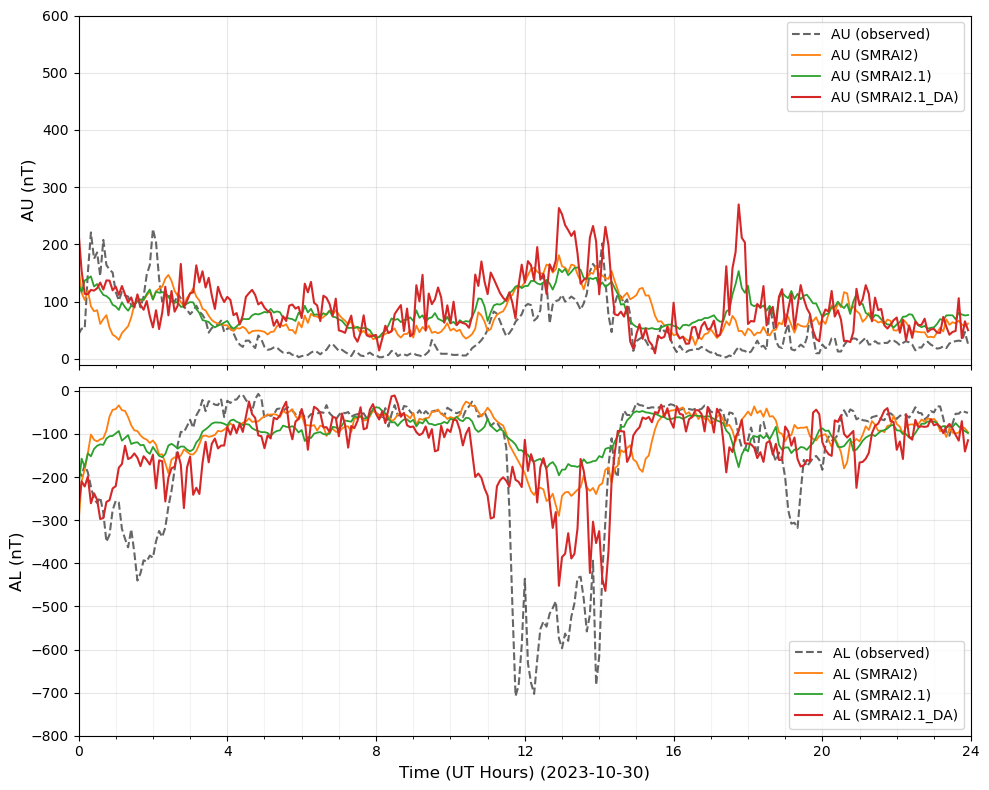

In [10]:
# Cell: Overlay all AU/AL series: observations, SMRAI2 (hall2), assimilated (cond×E), and control (cond×E)
cadence_min = 5.0
n_plot = n_time_ef
time_axis_hours = np.arange(n_plot) * cadence_min / 60.0

al_obs = alp.values.squeeze()
au_obs = aup.values.squeeze()

au_obs_series = au_obs[:n_plot]
al_obs_series = al_obs[:n_plot]
au_esn = au[:n_plot]
al_esn = al[:n_plot]
au_model_series = AU_model_DA[:n_plot]
al_model_series = AL_model_DA[:n_plot]
au_cntrl_series = AU_cntrl[:n_plot]
al_cntrl_series = AL_cntrl[:n_plot]

fig, (ax_au, ax_al) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax_au.plot(time_axis_hours, au_obs_series, '--', color='k', alpha=0.6, label='AU (observed)', linewidth=1.5)
ax_au.plot(time_axis_hours, au_esn, color='tab:orange', label='AU (SMRAI2)', linewidth=1.3)
ax_au.plot(time_axis_hours, au_cntrl_series, color='tab:green', label='AU (SMRAI2.1)', linewidth=1.3)
ax_au.plot(time_axis_hours, au_model_series, color='tab:red', label='AU (SMRAI2.1_DA)', linewidth=1.5)
ax_au.set_ylabel('AU (nT)', fontsize=12)
ax_au.set_ylim(-10, 600)
ax_au.grid(alpha=0.3)
ax_au.legend(loc='upper right', fontsize=10)

ax_al.plot(time_axis_hours, al_obs_series, '--', color='k', alpha=0.6, label='AL (observed)', linewidth=1.5)
ax_al.plot(time_axis_hours, al_esn, color='tab:orange', label='AL (SMRAI2)', linewidth=1.3)
ax_al.plot(time_axis_hours, al_cntrl_series, color='tab:green', label='AL (SMRAI2.1)', linewidth=1.3)
ax_al.plot(time_axis_hours, al_model_series, color='tab:red', label='AL (SMRAI2.1_DA)', linewidth=1.5)
ax_al.set_xlabel(f'Time (UT Hours) ({trange[0]})', fontsize=12)
ax_al.set_ylabel('AL (nT)', fontsize=12)
ax_al.set_ylim(-800, 10)
ax_al.set_xlim(0, 24)
ax_al.set_xticks(np.arange(0, 25, 4))
ax_al.set_xticks(np.arange(0, 25, 1), minor=True)
ax_al.grid(alpha=0.3)
ax_al.grid(alpha=0.15, which='minor')
ax_al.legend(loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()
